# SPI Pattern Generation Under (1) Monochromatic Beam and (2) SASE Operation Mode

In this notebook, the same particle and the same orientation are picked so that we can compare the difference between the SPI patterns generated under monochromatic beam and SASE operation mode. The SASE blurring effect is expected to be observed.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pysingfel as ps

In [3]:
input_dir='../input'
beamfile=input_dir+'/beam/amo86615.beam'
geom=input_dir+'/lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data'
pdbfile=input_dir+'/pdb/2CEX.pdb'

In [4]:
beam = ps.Beam(beamfile)
beam._n_phot *= 100

In [5]:
det = ps.PnccdDetector(geom=geom, beam=beam)
det.distance *= 0.3 # reset the detector distance to have desired resolution
beam.photon_energy = 7120.0 # reset the photon energy to that in LS49

In [6]:
particle = ps.Particle()
particle.read_pdb(pdbfile, ff='WK')

('Unknown element or wrong line: \n', 'HETATM 9529 ZN    ZN A1306      16.516   1.920  -2.897  0.50 39.31          ZN  \n')
('Unknown element or wrong line: \n', 'HETATM 9562 ZN    ZN B1310      79.517  -6.890  29.691  1.00 30.08          ZN  \n')
('Unknown element or wrong line: \n', 'HETATM 9563 ZN    ZN B1311      54.463  32.835  14.529  0.50 32.48          ZN  \n')
('Unknown element or wrong line: \n', 'HETATM 9564 ZN    ZN C1306      14.881  -6.161  50.429  1.00 30.87          ZN  \n')
('Unknown element or wrong line: \n', 'HETATM 9565 ZN    ZN C1307      22.417 -36.707  14.694  0.50 53.28          ZN  \n')
('Unknown element or wrong line: \n', 'HETATM 9572 ZN    ZN D1307      -6.904  24.013  20.912  0.50 21.13          ZN  \n')


# (1) Monochromatic Beam, SPI

In [7]:
experiment = ps.SPIExperiment(det, beam, particle)

In [8]:
def demo(experiment):
    viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
    img = experiment.generate_image()
    viz.imshow(img)
    plt.show()

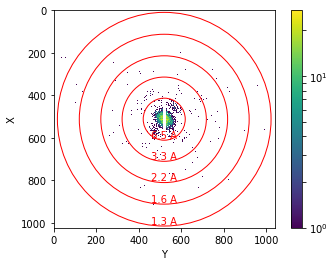

In [9]:
demo(experiment)

# (2) SASE Beam, SPI

In [10]:
Beam = ps.Beam

In [11]:
sase = ps.SASEBeam(mu=7120, sigma=10, n_spikes=100, fname=beamfile)
sase._n_phot *= 100

In [12]:
experiment = ps.SPIExperiment(det, sase, particle)

In [ ]:
demo(experiment)